<a href="https://colab.research.google.com/github/chathura40/Mini-Research-Project/blob/main/mine_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [3]:
# Directory to dataset in drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

dataset_path = '/content/drive/MyDrive/Colab Notebooks/data/'

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# This code uses the ImageDataGenerator class from TensorFlow's Keras library to preprocess and load image data from the specified directory dataset_path. 
# The images are resized to the specified image_size of (150, 150) and normalized by dividing each pixel value by 255. 


image_size = (150,150)
batch_size = 2


# Data generators
# The training data is divided into training and validation sets using the validation_split argument of the ImageDataGenerator, with 20% of the data set aside for validation. The training and validation sets are then loaded into train_batches and validation_batches generators, respectively, with a batch size of 7. 
# Finally, the test data is loaded into the test_batches generator, also with a batch size of 7. Note that shuffle is set to False for the test data, meaning that the data will be processed in order. It's important to ensure that the images in the dataset_path directory are properly structured and organized, with each class in a separate subdirectory. Also, make sure the dataset_path is set to the correct directory path.
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


train_batches = train_datagen.flow_from_directory(
        dataset_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training')


validation_batches = train_datagen.flow_from_directory(
        dataset_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation')


test_batches = train_datagen.flow_from_directory(
        dataset_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary', 
        shuffle=False,
        subset='validation')


Found 8 images belonging to 2 classes.
Found 2 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [15]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,2)
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

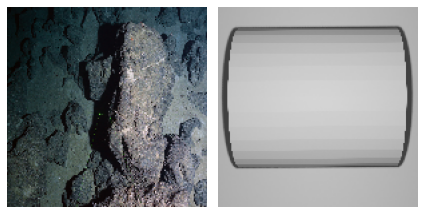

[1. 0.]


In [18]:
imgs, labels = train_batches[1]
plotImages(imgs)
print(labels[:2])